<a href="https://colab.research.google.com/github/MANISH-KUMAR-CODES/California-Housing-Prices-Prediction/blob/main/California_Housing_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The data we have contains information from the 1990 California census.**

### The columns are as follows, their names are pretty self-explanatory:

1) Median House Value: Median house value for households within a block (measured in US Dollars) [$]

2) Median Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars) [10k$]

3) Median Age: Median age of a house within a block; a lower number is a newer building [years]

4) Total Rooms: Total number of rooms within a block

5) Total Bedrooms: Total number of bedrooms within a block

6) Population: Total number of people residing within a block

7) Households: Total number of households, a group of people residing within a home unit, for a block

8) Latitude: A measure of how far north a house is; a higher value is farther north [°]

9) Longitude: A measure of how far west a house is; a higher value is farther west [°]

10) Distance to coast: Distance to the nearest coast point [m]

11) Distance to Los Angeles: Distance to the centre of Los Angeles [m]

12) Distance to San Diego: Distance to the centre of San Diego [m]

13) Distance to San Jose: Distance to the centre of San Jose [m]

14) Distance to San Francisco: Distance to the centre of San Francisco [m]




In [14]:
## Lets import all necessary libraries and packages 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from typing import Dict, List
%matplotlib inline
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')



In [15]:
## lets import our csv file and checking top rows
california_housing_df = pd.read_csv('/content/drive/MyDrive/California_Houses.csv')
california_housing_df

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [16]:
# lets check information of our dataset
california_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

Our data set contains 20640 rows and 14 columns, and luckily we dont have any null values here,

In [17]:
#lets check the description of our dataset
california_housing_df.describe(include='all')

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [18]:
#columns in our Dataframe
california_housing_df.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

## **Exploratory Data Analysis**

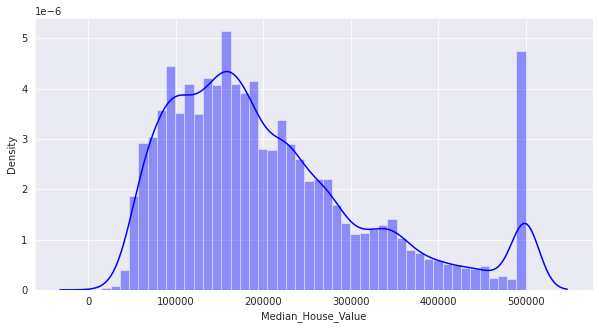

In [19]:
# Dependent variable 'Median_House_Value'
plt.figure(figsize=(10,5))
sns.distplot(california_housing_df['Median_House_Value'],color="b")

As we see here in our distplot the median house values is not normally distributed because of some outliers or we can say rows containing values above 490000, lets try checking what are the count of those rows and if we remove them will it change our distibution plot and by how much

In [20]:
# Checking count of rows
len(california_housing_df[california_housing_df['Median_House_Value']>490000])

1031

The count of these rows is very less in compared with the length of our dataframe, if we remove them it wont affect our predictions much 

In [21]:
california_housing_df = california_housing_df[california_housing_df['Median_House_Value']<500000]
len(california_housing_df)

19648

the number of rows left after removing them is :19648

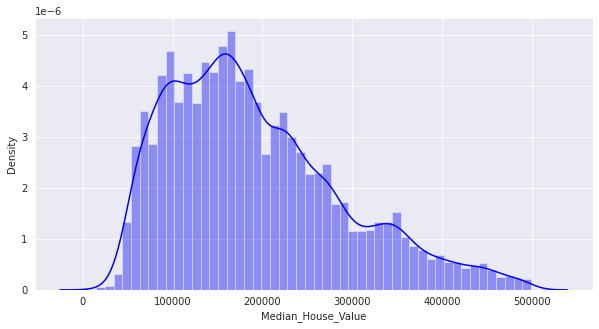

In [22]:
## Checking our distplot again
plt.figure(figsize=(10,5))
sns.distplot(california_housing_df['Median_House_Value'],color="b")

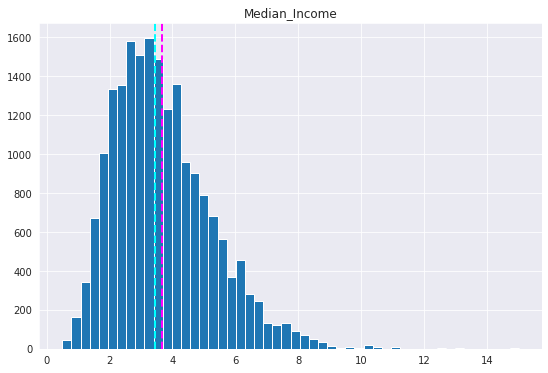

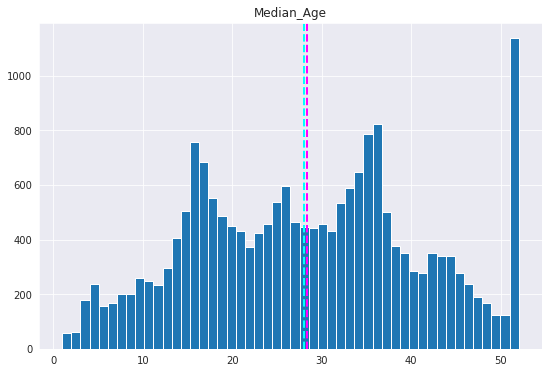

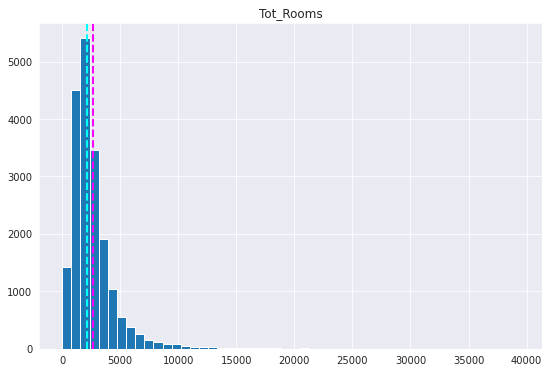

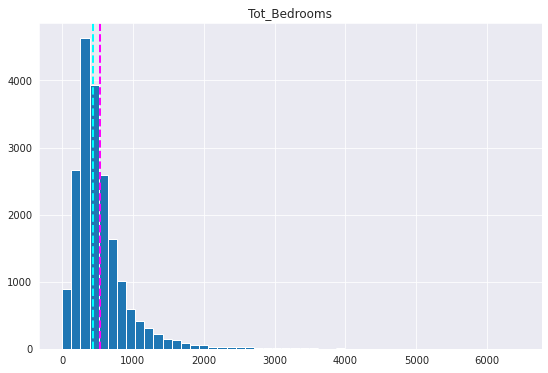

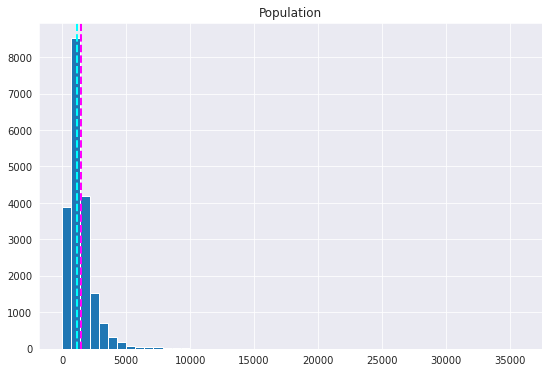

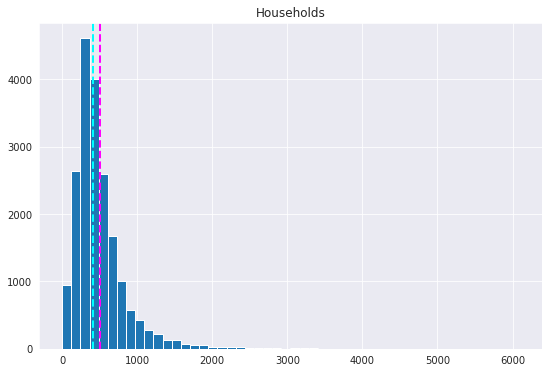

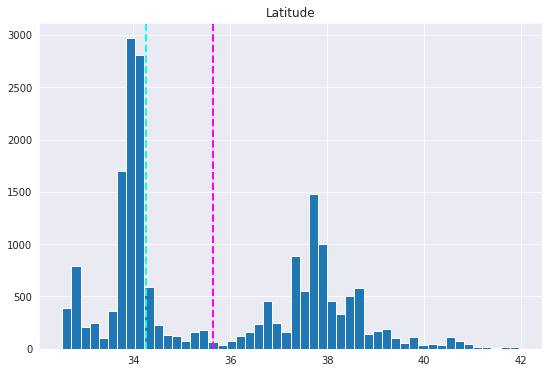

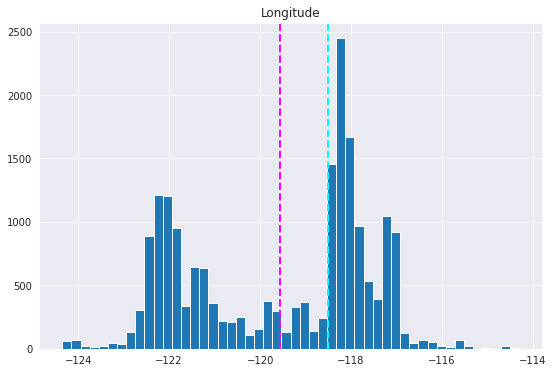

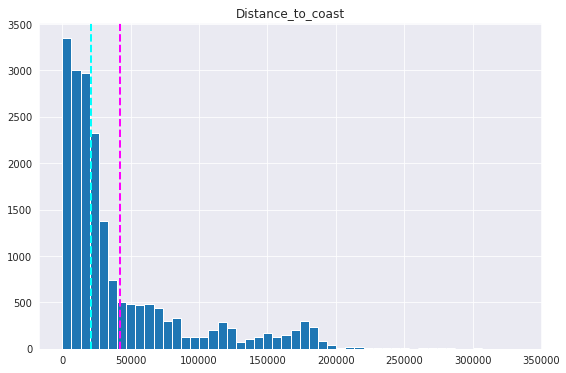

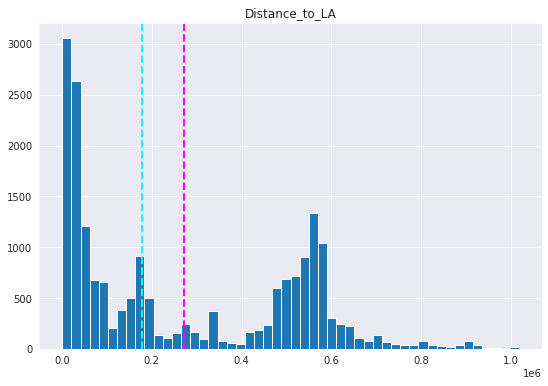

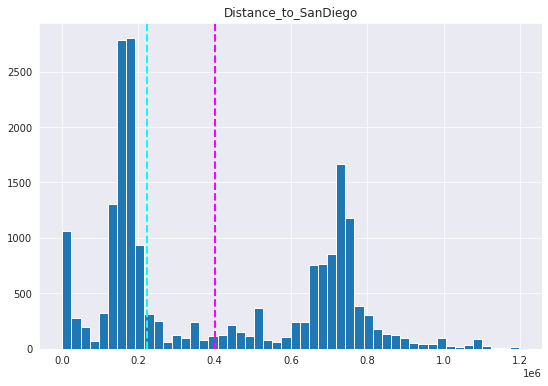

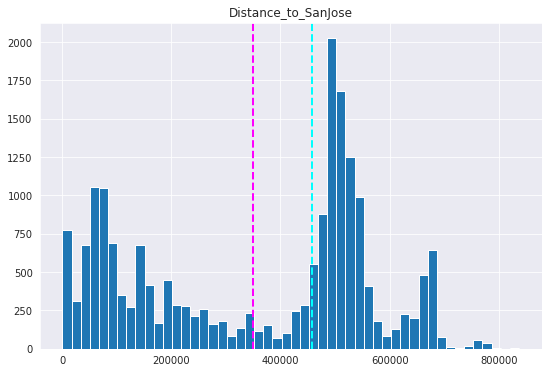

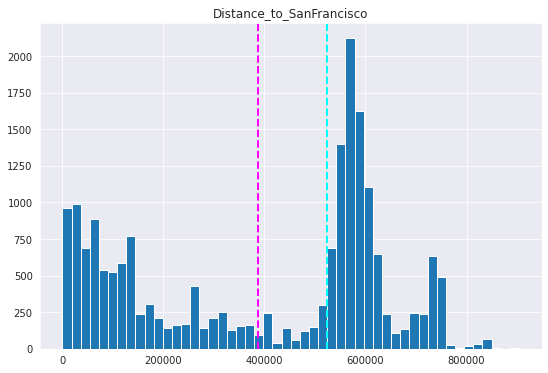

In [23]:
#ploting a hist plot for each column
for col in california_housing_df.columns[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = california_housing_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

From the hist plot we see some columns "Household", "Population", "Tot_ bedroom", "Tot_Room", "Median_income", "Distance_to_coast" are right skewed. 

## we will try to remove some outliers from few more columns of our dataframe

In [24]:
california_housing_df.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

In [25]:
#selecting cloumns to fix 
columns_to_fix = ['Median_Income','Tot_Rooms','Tot_Bedrooms','Population','Households']

In [26]:
#Defining percentile range and calulating IQR
Q1 = california_housing_df[columns_to_fix].quantile(0.25)    #25% percentile
Q3 = california_housing_df[columns_to_fix].quantile(0.75)    #75% percentile
IQR = Q3 - Q1     #IQR (Inter Quartile Range)
print(IQR)

Median_Income       2.0562
Tot_Rooms        1683.0000
Tot_Bedrooms      351.0000
Population        950.2500
Households        324.0000
dtype: float64


In [27]:
# Treating ouliers from our dataframe
california_housing_df = california_housing_df[~((california_housing_df[columns_to_fix] < (Q1 - 1.5 * IQR)) |(california_housing_df[columns_to_fix] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
#checking our decription of dataframe if it worked or not
california_housing_df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,17578.000000,17578.000000,17578.000000,17578.000000,17578.000000,17578.000000,17578.000000,17578.000000,17578.000000,17578.000000,1.757800e+04,1.757800e+04,17578.000000,17578.000000
mean,186892.643987,3.554678,29.558482,2143.488451,446.212482,1199.846001,417.493799,35.693922,-119.601985,42378.800577,2.761930e+05,4.055280e+05,346804.041361,383471.972211
std,94210.836689,1.413496,12.201575,1087.060028,221.758527,605.761127,205.892955,2.166839,2.003869,50816.262094,2.499348e+05,2.919584e+05,216038.752589,248886.764698
min,14999.000000,0.499900,1.000000,2.000000,2.000000,3.000000,2.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,112700.000000,2.486450,19.000000,1375.000000,287.000000,767.000000,271.000000,33.940000,-121.780000,9599.691313,3.202169e+04,1.600332e+05,116842.414128,120122.358020
50%,169600.000000,3.381000,30.000000,1978.000000,412.000000,1112.000000,388.000000,34.300000,-118.580000,21139.661195,1.808423e+05,2.359360e+05,447643.528911,512049.927434
75%,241000.000000,4.463400,38.000000,2782.000000,579.000000,1562.000000,541.000000,37.740000,-118.030000,53357.308171,5.315170e+05,7.100448e+05,515212.252094,582957.984730
max,499100.000000,7.665900,52.000000,5645.000000,1173.000000,3171.000000,1092.000000,41.950000,-114.490000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


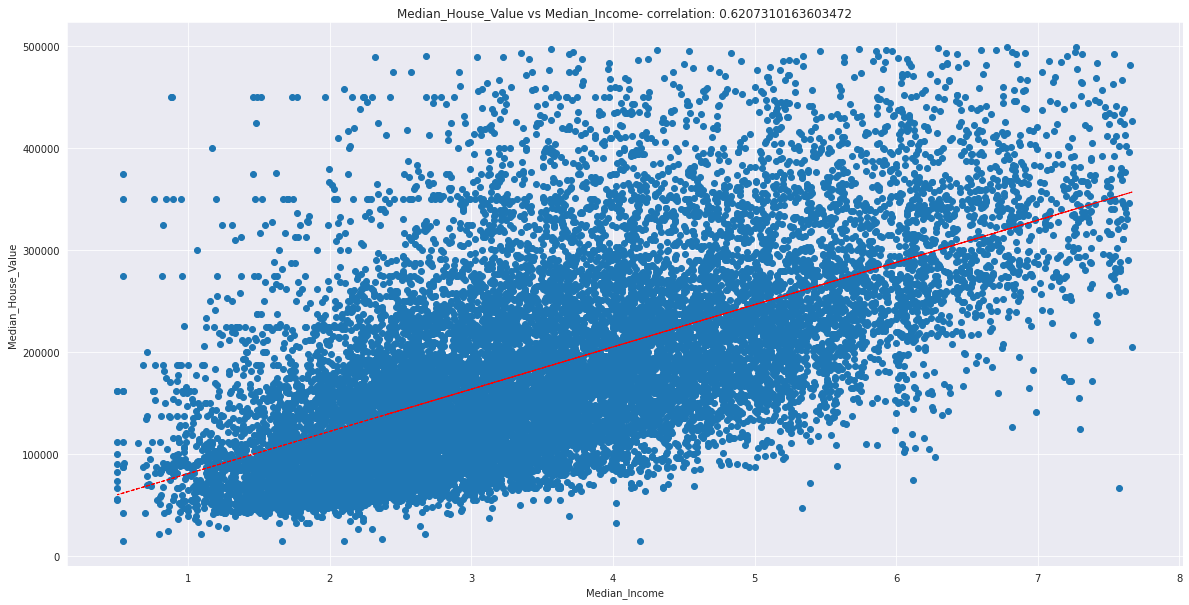

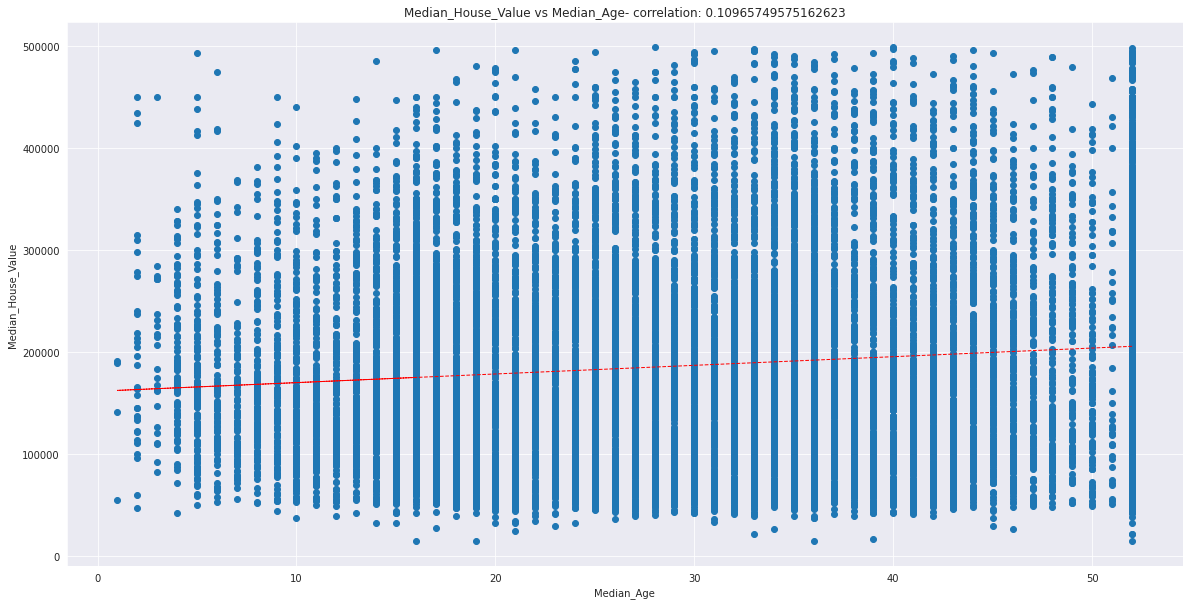

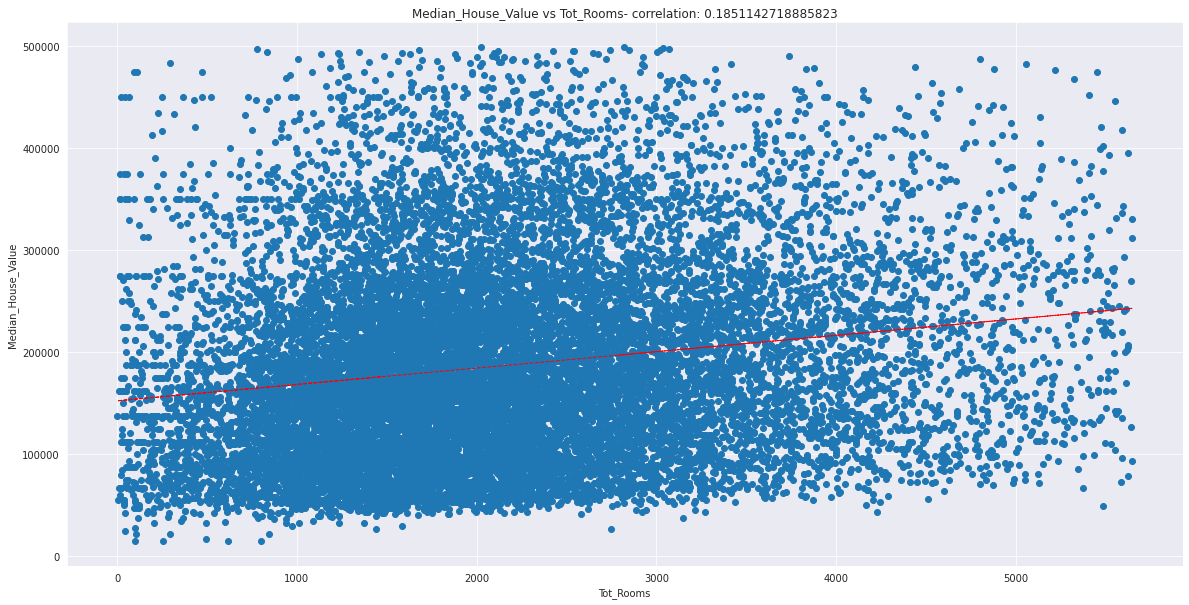

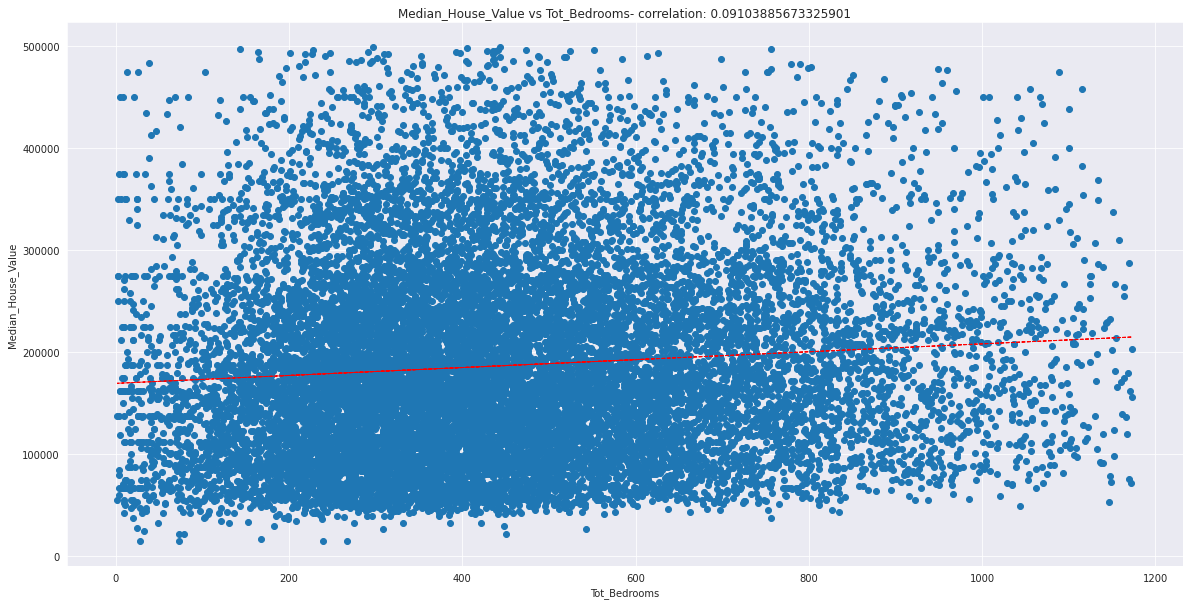

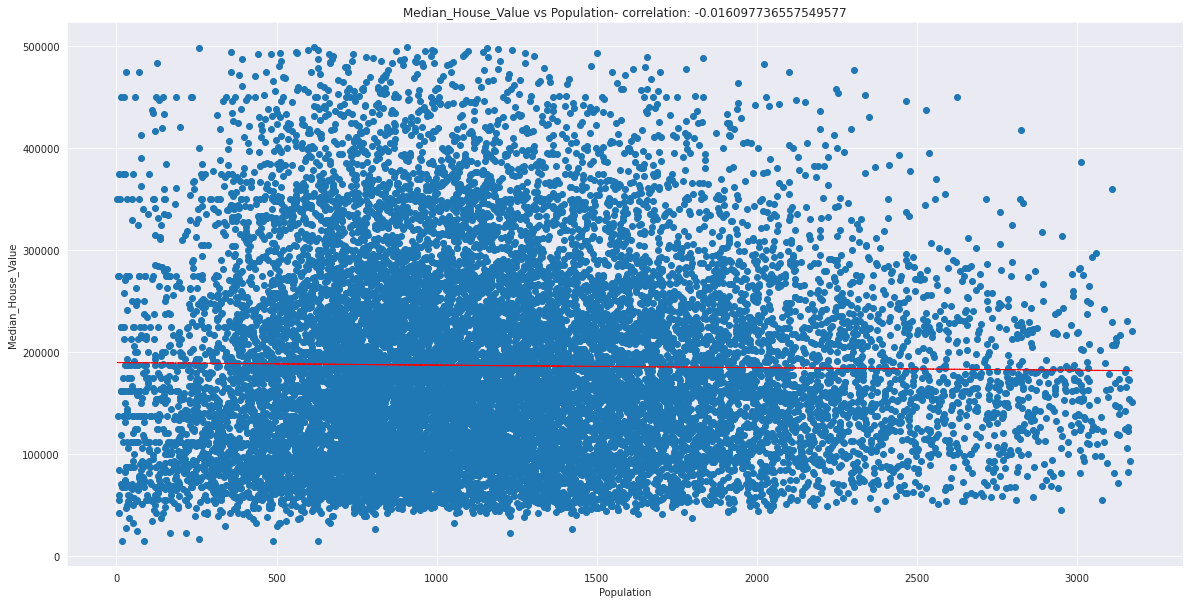

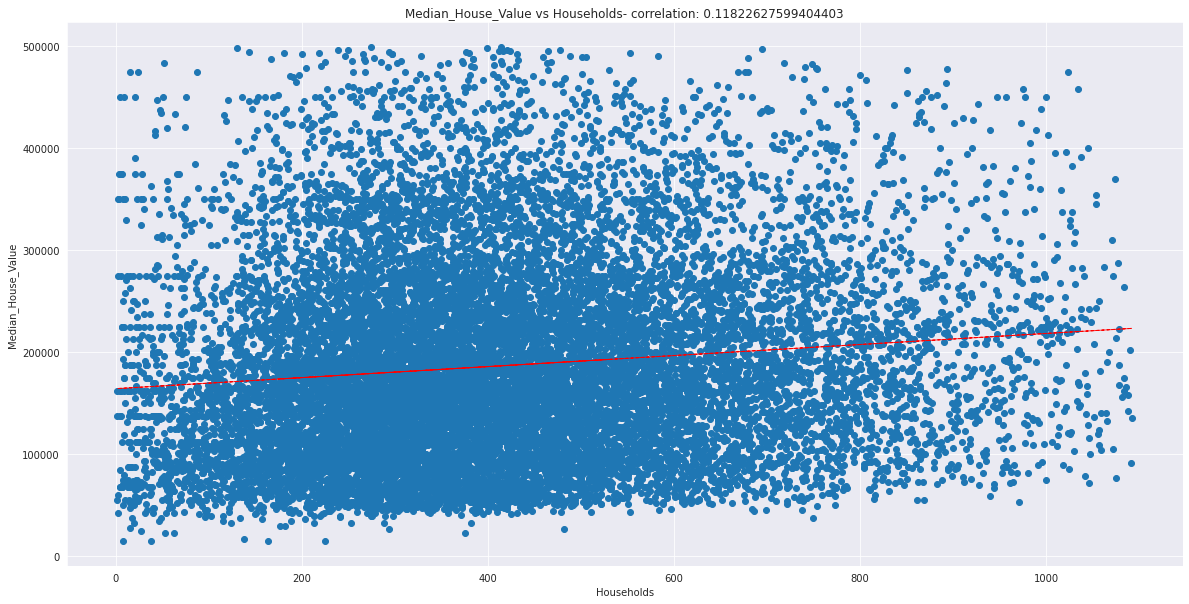

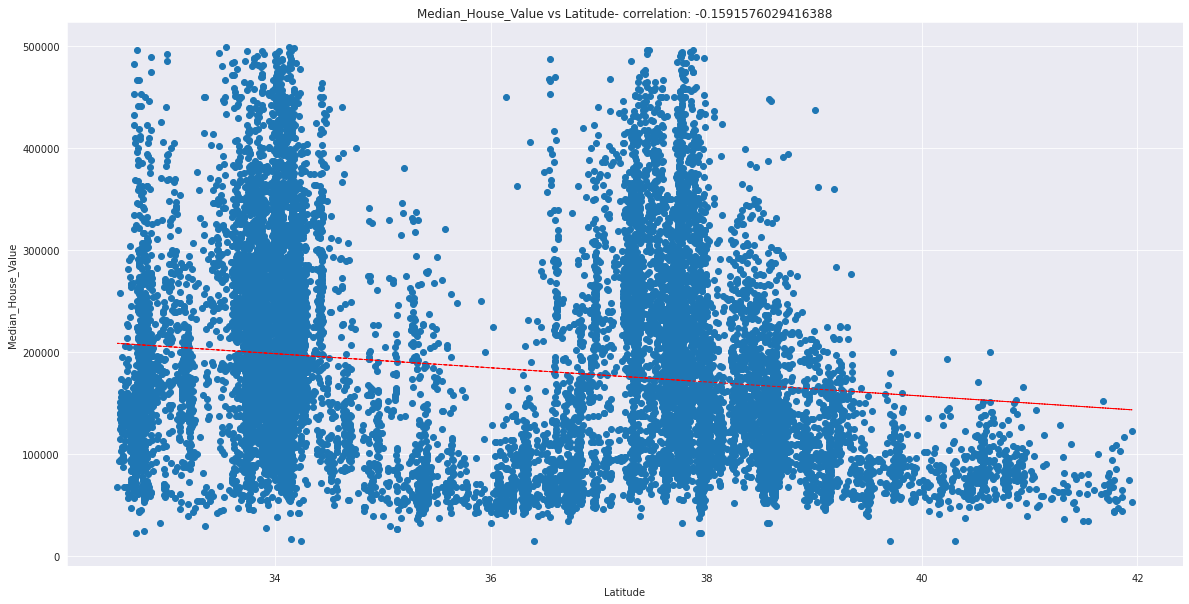

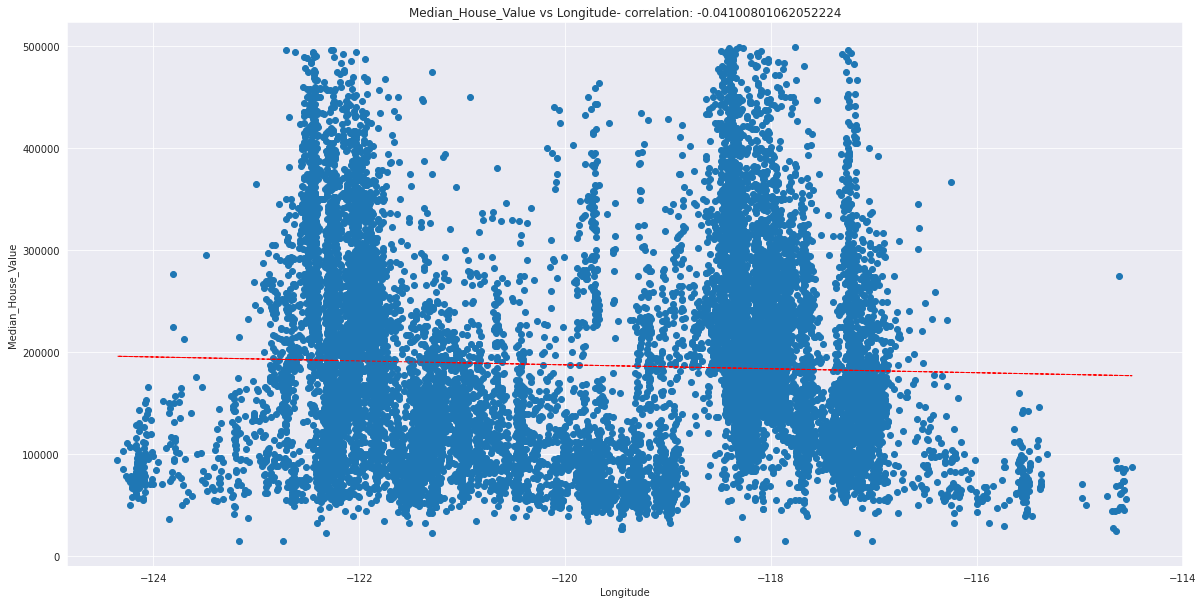

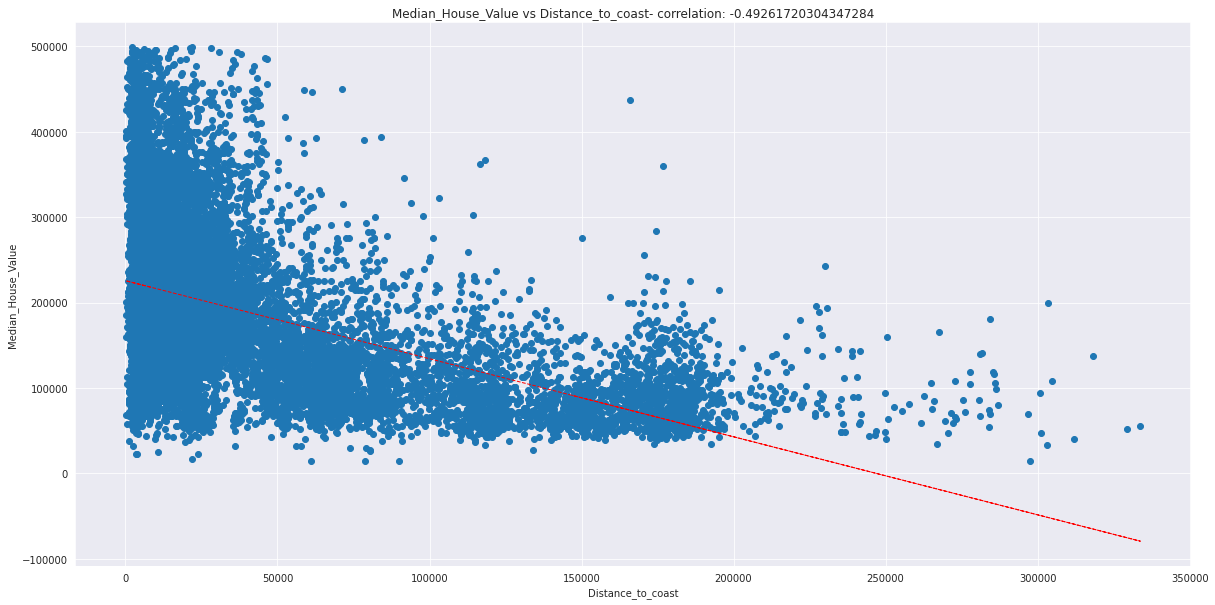

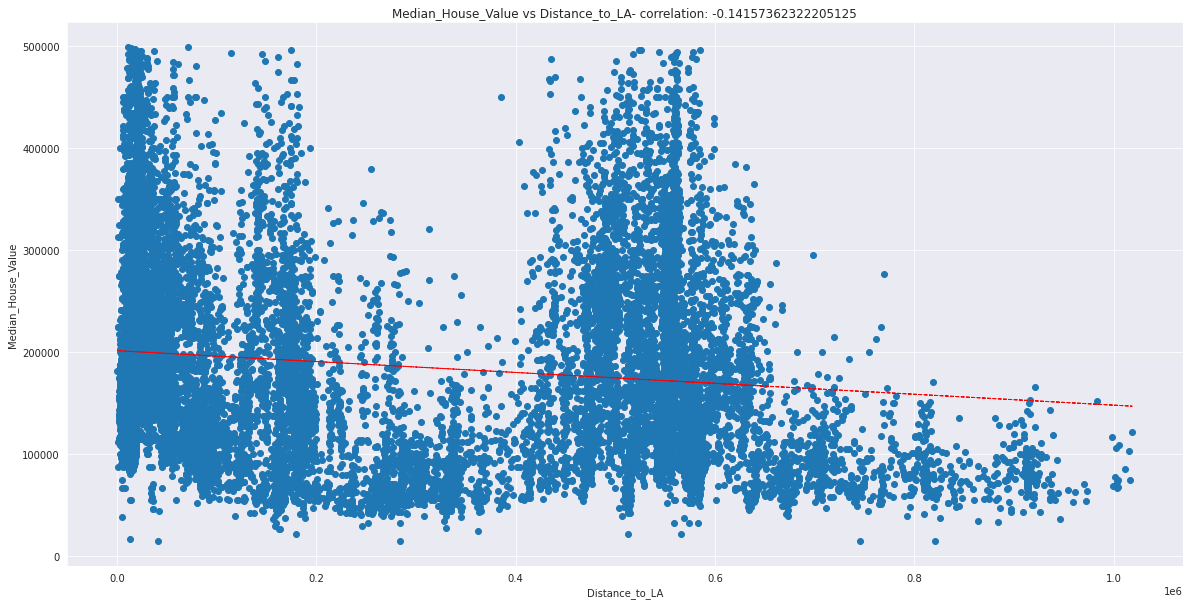

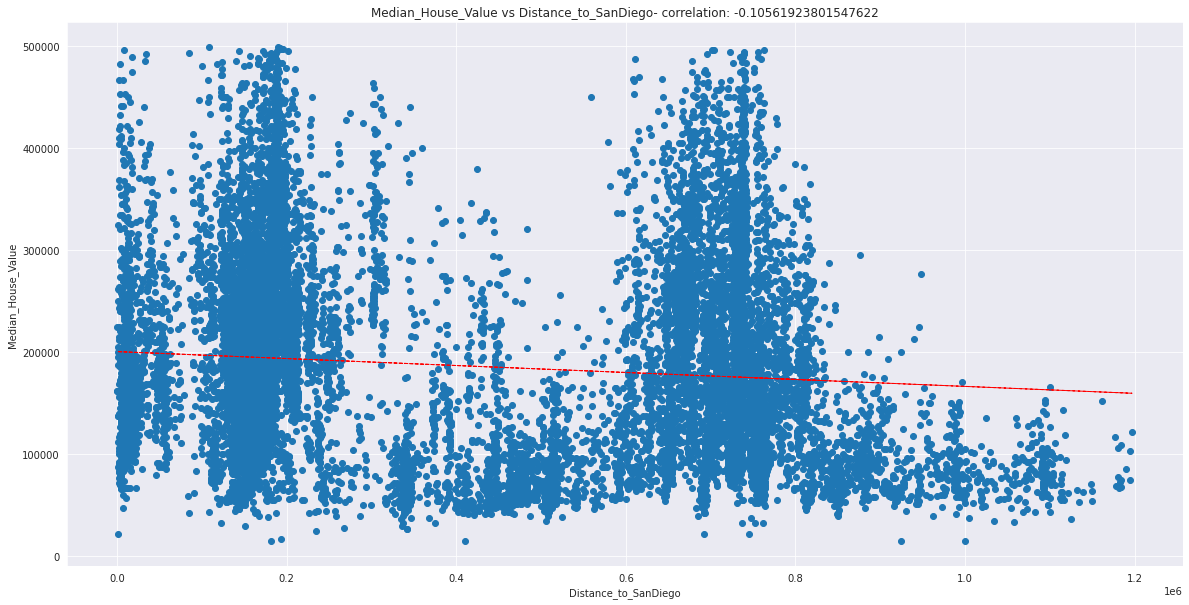

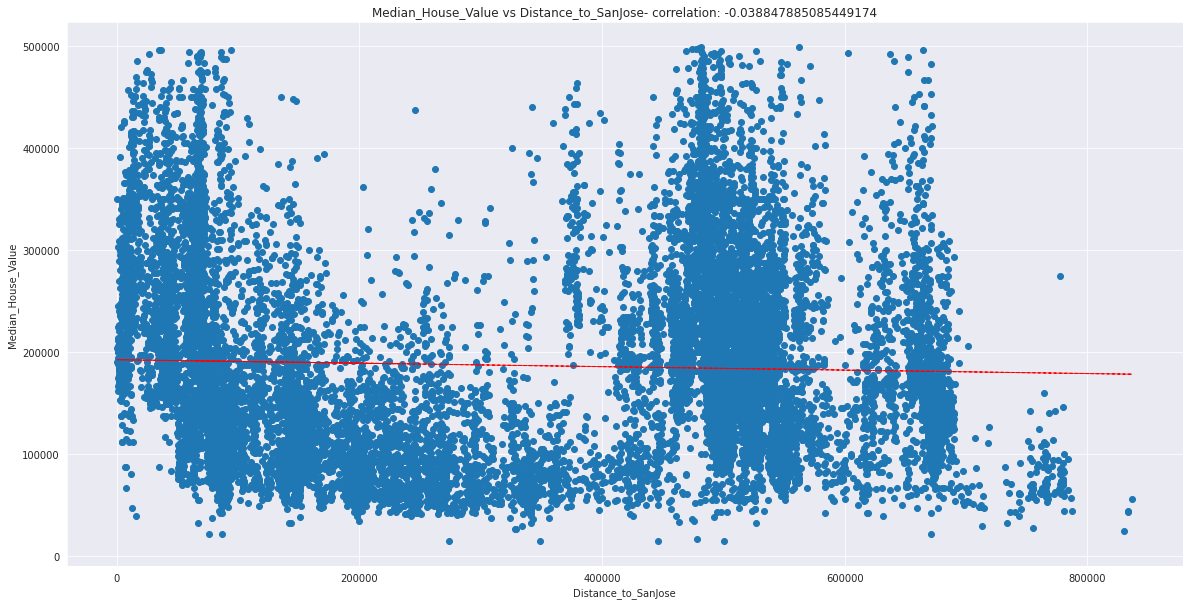

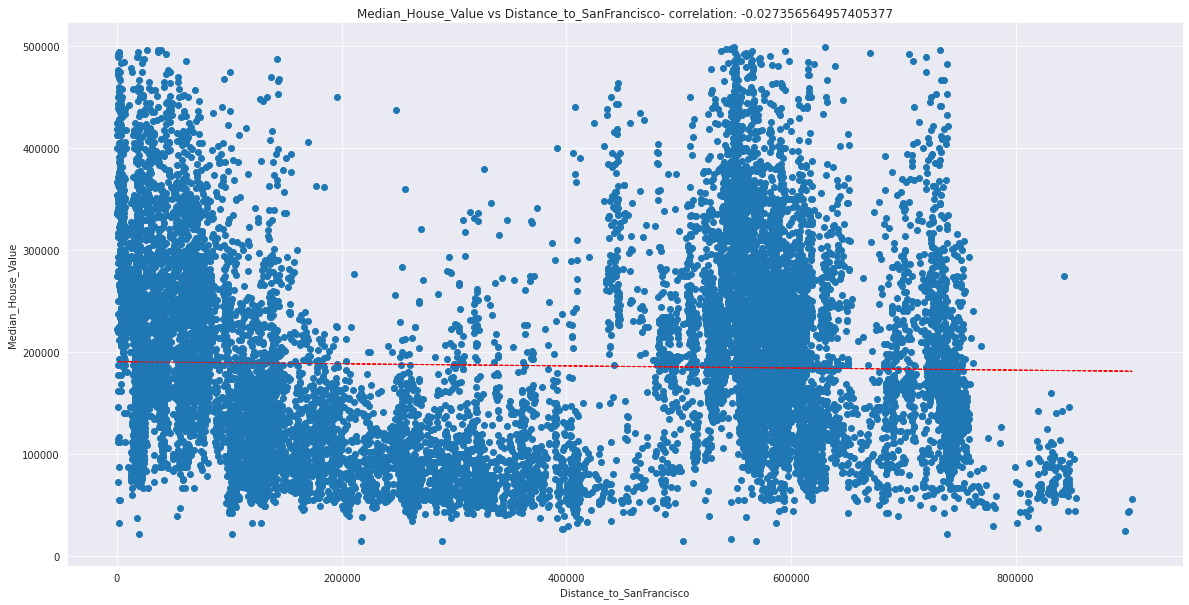

In [29]:
# plotting a scatter plot for all the independent columns vs dependent column
for col in california_housing_df.columns[1:]:
    fig = plt.figure(figsize=(20, 10))
    ax = fig.gca()
    feature = california_housing_df[col]
    label = california_housing_df['Median_House_Value']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Median_House_Value')
    ax.set_title('Median_House_Value vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(california_housing_df[col], california_housing_df['Median_House_Value'], 1)
    y_hat = np.poly1d(z)(california_housing_df[col])

    plt.plot(california_housing_df[col], y_hat, "r--", lw=1)

plt.show()

## **CORRELATION**

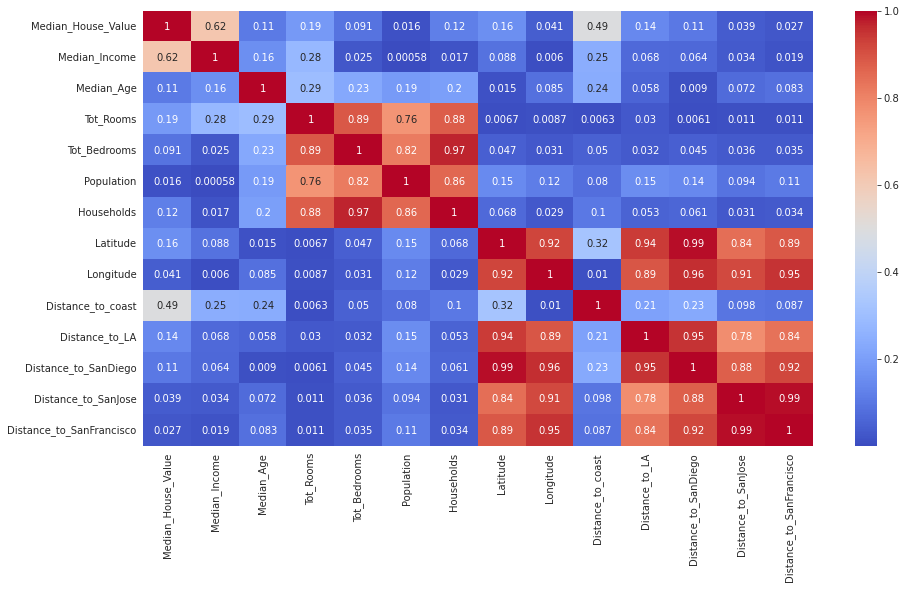

In [30]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = california_housing_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [31]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [32]:
calc_vif(california_housing_df)

,variables,VIF
0,Median_House_Value,12.834071
1,Median_Income,24.386088
2,Median_Age,9.624316
3,Tot_Rooms,51.793817
4,Tot_Bedrooms,126.998847
5,Population,23.663060
6,Households,124.649432
7,Latitude,29644.703453
8,Longitude,24954.043565
9,Distance_to_coast,6.596817


In [33]:
calc_vif(california_housing_df[[i for i in california_housing_df.describe().columns if i not in ['Median_House_Value','Latitude','Longitude','Distance_to_SanJose','Distance_to_SanFrancisco','Tot_Bedrooms','Distance_to_SanDiego','Households']]])

,variables,VIF
0,Median_Income,6.171889
1,Median_Age,4.292623
2,Tot_Rooms,16.260388
3,Population,12.703101
4,Distance_to_coast,1.669885
5,Distance_to_LA,2.338138


### **FEATURE ENGINEERING**

What is feature engineering?

Its playing around with features to acheive below goals.

Preparing the proper input dataset, compatible with the machine 
learning algorithm requirements.

Improving the performance of machine learning models.

In [34]:
#Normalization/scaling of data - understanding scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(california_housing_df)
scaled_data

array([[0.69634436, 0.9429947 , 1.        , ..., 0.61268783, 0.07689352,
        0.02032321],
       [0.67403496, 0.71772258, 1.        , ..., 0.61316391, 0.07739562,
        0.0194591 ],
       [0.67589408, 0.46696902, 1.        , ..., 0.61316391, 0.07739562,
        0.0194591 ],
       ...,
       [0.15967949, 0.16747139, 0.31372549, ..., 0.6939074 , 0.28653996,
        0.23433179],
       [0.14398029, 0.1908038 , 0.33333333, ..., 0.69722801, 0.28417405,
        0.22970948],
       [0.153689  , 0.26356405, 0.29411765, ..., 0.68961933, 0.27830089,
        0.22699701]])

In [35]:
#converting data back to pandas dataframe
california_housing_df_scaled = pd.DataFrame(scaled_data)
california_housing_df_scaled.columns = california_housing_df.columns

In [36]:
# Assainging our X and y values for testing various models
X = california_housing_df_scaled.drop('Median_House_Value',axis = 1)
y = california_housing_df_scaled['Median_House_Value']

## **LINEAR REGRESSION**

In [37]:
#Dividing data in test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Importing neccesary packages
from sklearn.linear_model import LinearRegression
from sklearn import metrics
print(X_train.shape)
print(X_test.shape)

(14062, 13)
(3516, 13)


In [38]:
#Fitting lineaar regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
model.coef_

array([ 0.59585597,  0.0739441 , -0.1820741 ,  0.44240585, -0.42281536,
        0.19140039, -0.7387755 , -0.47463899, -0.14548365, -0.30596628,
        0.5311752 ,  0.20640128, -0.20243592])

In [40]:
#Checking accuracy on train data
accuracy = model.score(X_train,y_train)
print(accuracy*100,'%')

61.58834626557108 %


In [41]:
#Checking accuracy on test data
accuracy = model.score(X_test,y_test)
print(accuracy*100,'%')

61.81159081742719 %


In [42]:
y_pred = model.predict(X_test)

metrics.r2_score(y_pred,y_test)

0.38254955334404805

In [43]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.014612006584918397
RMSE : 0.12088013312748459


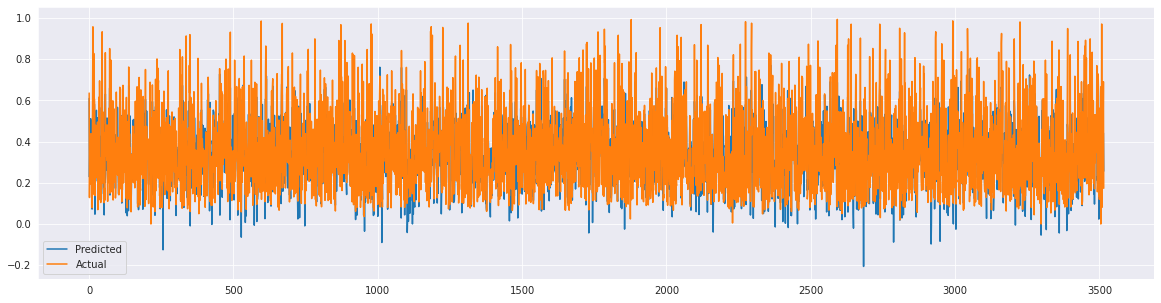

In [44]:
plt.figure(figsize=(20,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [50]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X, y) 

RandomForestRegressor(n_estimators=10, random_state=0)

In [51]:
#Checking accuracy on train data
accuracy1 = regressor.score(X_train,y_train)
print(accuracy*100,'%')

61.81159081742719 %


In [52]:
#Checking accuracy on test data
accuracy2 = model.score(X_test,y_test)
print(accuracy*100,'%')

61.81159081742719 %


In [53]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08994418900259922
Mean Squared Error: 0.014612006584918397
Root Mean Squared Error: 0.12088013312748459
